## __running cost playground__

In [9]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [10]:
import matplotlib.pyplot as plt

In [11]:
from src.runningcost import zero_cost, gaussian_cost, constant_cost

In [12]:
from src.domains import rectangle_domain
from src.boundary import build_boundary, affine_boundary
from src.problem import make_problem
from src.solver import solve_equation
from src.viz import plot_u, plot_residual, write_video, plot_delta_residual_sweep, plot_alpha, plot_u_alpha_diff
from src.experiments import sweep_deltas, run_random_policies

In [13]:
# problem setup
nx = ny = 50
mask = rectangle_domain(nx, ny)
g = build_boundary(nx, ny, mask, affine_boundary)

### __constant__

In [14]:
f = constant_cost(nx, ny, 1)
problem = make_problem(nx, ny, mask=mask, g=g, f=f, h=1.0)

#### __jacobi__

In [15]:
uJ, policyJ, histJ, snapsJ, itersJ = solve_equation(problem, method="jacobi", tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 6888 iterations.


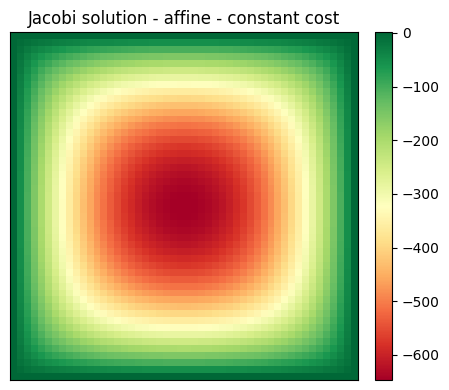

In [16]:
plot_u(uJ, "Jacobi solution - affine - constant cost")

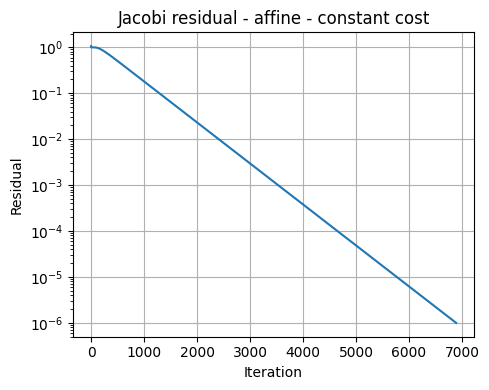

In [17]:
plot_residual(histJ, "Jacobi residual - affine - constant cost")

In [18]:
movie_path = PROJECT_ROOT / "movies" / "jacobi_constant.mp4"
write_video(snapsJ, itersJ, filename=movie_path, fps=10)

#### __jacobi w/ contraction__

In [19]:
delta = 0.95
uJC, policyJC, histJC, snapsJC, itersJC = solve_equation(problem, method="jacobi", delta=delta, tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 266 iterations.


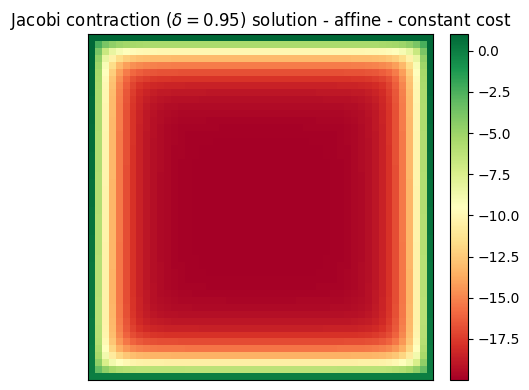

In [20]:
plot_u(uJC, fr"Jacobi contraction ($\delta = {delta}$) solution - affine - constant cost")

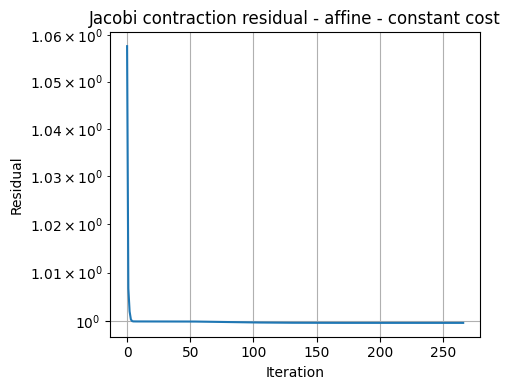

In [21]:
plot_residual(histJC, "Jacobi contraction residual - affine - constant cost")

In [22]:
movie_path = PROJECT_ROOT / "movies" / "jc_const.mp4"
write_video(snapsJC, itersJC, filename=movie_path, fps=10)

#### __loop over deltas__

Converged in 6888 iterations.
Converged in 4635 iterations.
Converged in 2005 iterations.
Converged in 1171 iterations.
Converged in 638 iterations.
Converged in 266 iterations.


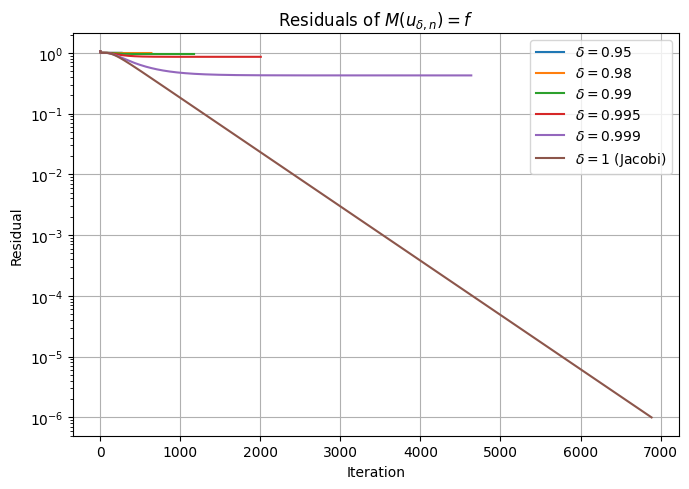

In [23]:
deltas = [1.0, 0.999, 0.995, 0.99, 0.98, 0.95]

results = sweep_deltas(
    problem,
    deltas=deltas,
    method="jacobi"
)

plot_delta_residual_sweep(results)

#### __gauss-seidel__

In [24]:
uGS, policyGS, histGS, snapsGS, itersGS = solve_equation(problem, method="gs", tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 3614 iterations.


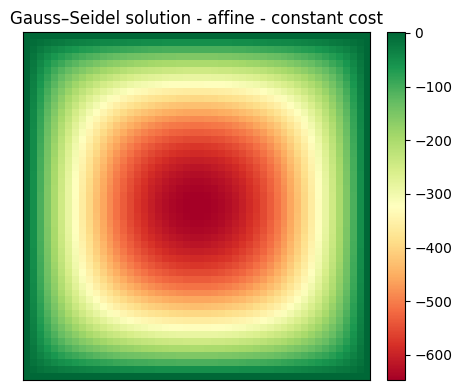

In [25]:
plot_u(uGS, "Gauss–Seidel solution - affine - constant cost")

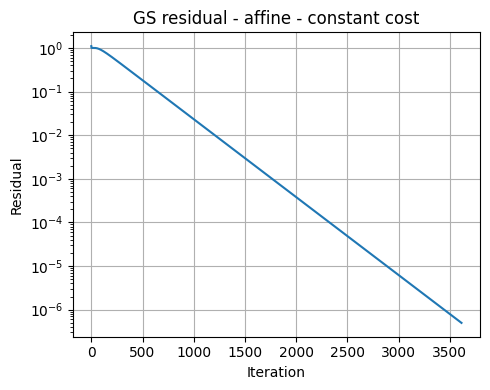

In [26]:
plot_residual(histGS, "GS residual - affine - constant cost")

In [27]:
movie_path = PROJECT_ROOT / "movies" / "gs_const.mp4"
write_video(snapsGS, itersGS, filename=movie_path, fps=10)

#### __random strategy__

In [28]:
out = run_random_policies(problem, uGS, n=1, seed=0, method="gs")

In [29]:
alpha = out["alphas"][0]
u_alpha = out["solutions"][0]

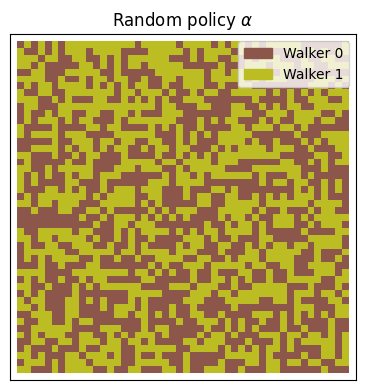

In [30]:
plot_alpha(alpha, mask)

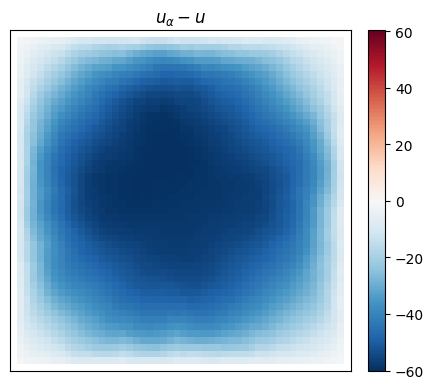

In [31]:
plot_u_alpha_diff(u_alpha, uGS, mask)

### __gaussian from center__

In [32]:
f = gaussian_cost(nx, ny, 3)
problem = make_problem(nx, ny, mask=mask, g=g, f=f, h=1.0)

#### __jacobi__

In [33]:
uJ, policyJ, histJ, snapsJ, itersJ = solve_equation(problem, method="jacobi", tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 5049 iterations.


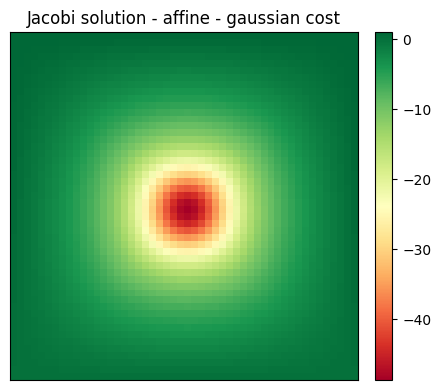

In [34]:
plot_u(uJ, "Jacobi solution - affine - gaussian cost")

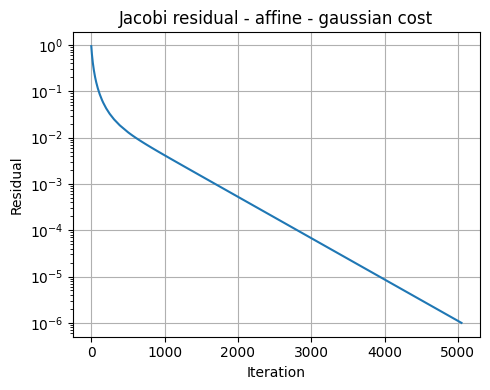

In [35]:
plot_residual(histJ, "Jacobi residual - affine - gaussian cost")

In [36]:
movie_path = PROJECT_ROOT / "movies" / "jacobi_gauss.mp4"
write_video(snapsJ, itersJ, filename=movie_path, fps=10)

#### __jacobi w/ contraction__

In [37]:
delta = 0.95
uJC, policyJC, histJC, snapsJC, itersJC = solve_equation(problem, method="jacobi", delta=delta, tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 222 iterations.


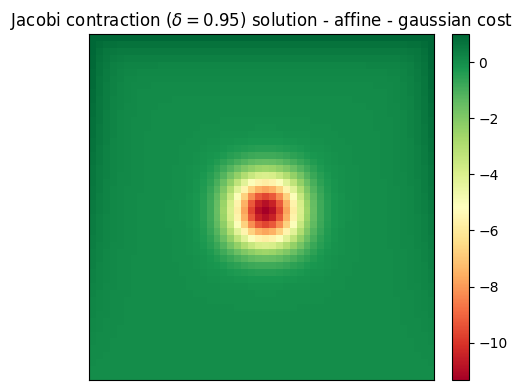

In [38]:
plot_u(uJC, fr"Jacobi contraction ($\delta = {delta}$) solution - affine - gaussian cost")

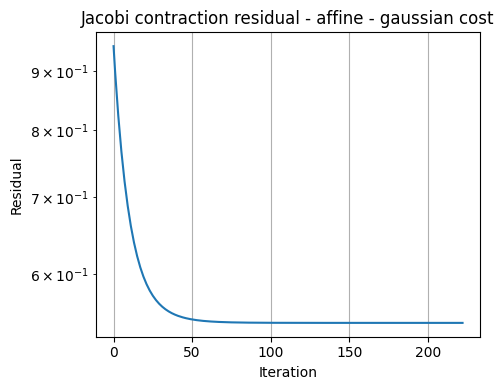

In [39]:
plot_residual(histJC, "Jacobi contraction residual - affine - gaussian cost")

In [40]:
movie_path = PROJECT_ROOT / "movies" / "jc_gauss.mp4"
write_video(snapsJC, itersJC, filename=movie_path, fps=10)

#### __loop over deltas__

Converged in 5049 iterations.
Converged in 3417 iterations.
Converged in 1509 iterations.
Converged in 899 iterations.
Converged in 504 iterations.
Converged in 222 iterations.


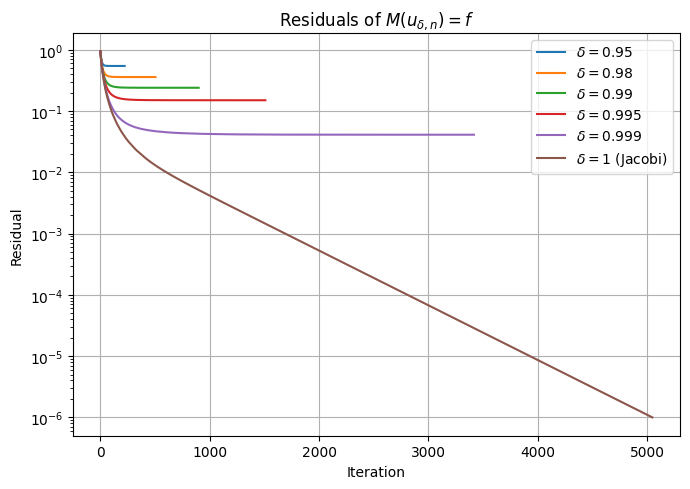

In [41]:
deltas = [1.0, 0.999, 0.995, 0.99, 0.98, 0.95]

results = sweep_deltas(
    problem,
    deltas=deltas,
    method="jacobi"
)

plot_delta_residual_sweep(results)

#### __gauss-seidel__

In [42]:
uGS, policyGS, histGS, snapsGS, itersGS = solve_equation(problem, method="gs", tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 2695 iterations.


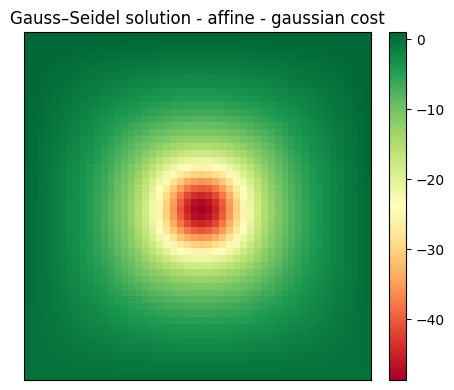

In [43]:
plot_u(uGS, "Gauss–Seidel solution - affine - gaussian cost")

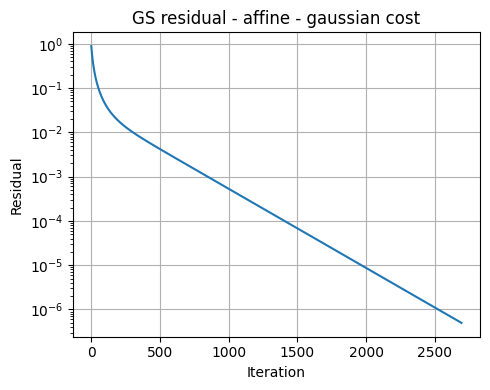

In [44]:
plot_residual(histGS, "GS residual - affine - gaussian cost")

In [45]:
movie_path = PROJECT_ROOT / "movies" / "gs_gauss.mp4"
write_video(snapsGS, itersGS, filename=movie_path, fps=10)

#### __random strategy__

In [46]:
out = run_random_policies(problem, uGS, n=1, seed=0, method="gs")

In [47]:
alpha = out["alphas"][0]
u_alpha = out["solutions"][0]

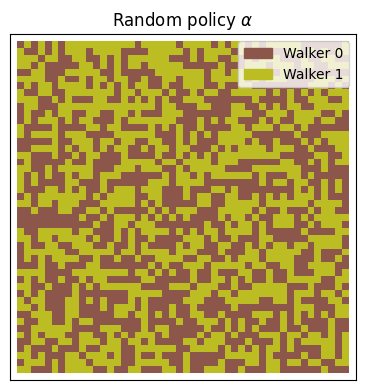

In [48]:
plot_alpha(alpha, mask)

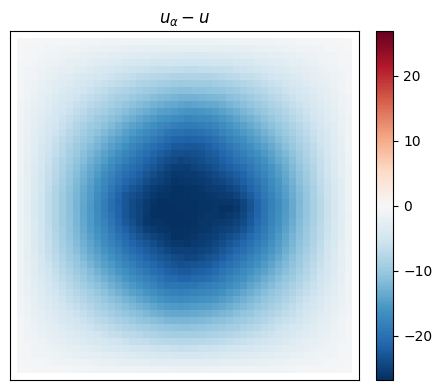

In [49]:
plot_u_alpha_diff(u_alpha, uGS, mask)